In [115]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set() 
import numpy as np
import pandas as pd
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics import silhouette_samples, silhouette_score
from yellowbrick.cluster import SilhouetteVisualizer

In [116]:
df = pd.read_csv("data/processed_data.csv")
print(df.shape)
df.sample(5)

(973, 19)


,GRUPO EN NIIF,SUPERVISOR_SUPERFINANCIERA,SUPERVISOR_SUPERSALUD,SUPERVISOR_SUPERSERVICIOS,SUPERVISOR_SUPERSOCIEDADES,SUPERVISOR_SUPERVIGILANCIA,REGION_Antioquia,REGION_Bogotá - Cundinamarca,REGION_Costa Atlantica,REGION_Costa Pacífica,REGION_Otros,MACROSECTOR_AGROPECUARIO,MACROSECTOR_COMERCIO,MACROSECTOR_CONSTRUCCION,MACROSECTOR_MANUFACTURA,MACROSECTOR_MINERO-HIDROCARBUROS,MACROSECTOR_SERVICIOS,VARIACION ACTIVOS,GANANCIA (PERDIDA) PROMEDIO
899,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0.011136,233596455.0
69,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1.432345,-11827390.0
810,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0.207868,115855345.0
650,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0.112905,3686205.0
296,2,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0.169831,51428630.0


In [117]:
# Estandarización de los datos
df = (df-df.min())/(df.max()-df.min())
df.describe()

,GRUPO EN NIIF,SUPERVISOR_SUPERFINANCIERA,SUPERVISOR_SUPERSALUD,SUPERVISOR_SUPERSERVICIOS,SUPERVISOR_SUPERSOCIEDADES,SUPERVISOR_SUPERVIGILANCIA,REGION_Antioquia,REGION_Bogotá - Cundinamarca,REGION_Costa Atlantica,REGION_Costa Pacífica,REGION_Otros,MACROSECTOR_AGROPECUARIO,MACROSECTOR_COMERCIO,MACROSECTOR_CONSTRUCCION,MACROSECTOR_MANUFACTURA,MACROSECTOR_MINERO-HIDROCARBUROS,MACROSECTOR_SERVICIOS,VARIACION ACTIVOS,GANANCIA (PERDIDA) PROMEDIO
count,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000
mean,0.230216,0.039054,0.030832,0.016444,0.909558,0.004111,0.163412,0.554985,0.096608,0.127441,0.057554,0.023638,0.305242,0.065776,0.338129,0.054471,0.212744,0.367541,0.512286
std,0.421187,0.193824,0.172953,0.127241,0.286961,0.064018,0.369931,0.497223,0.295576,0.333638,0.233018,0.151997,0.460746,0.248018,0.473316,0.227061,0.409459,0.084160,0.081666
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.327036,0.500277
50%,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.355576,0.501995
75%,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.394646,0.507527
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [118]:
nbrs = NearestNeighbors(n_neighbors=5).fit(df)

# Find the k-neighbors of a point
neigh_dist, neigh_ind = nbrs.kneighbors(df)
# sort the neighbor distances (lengths to points) in ascending order
# axis = 0 represents sort along first axis i.e. sort along row
sort_neigh_dist = np.sort(neigh_dist, axis=0)

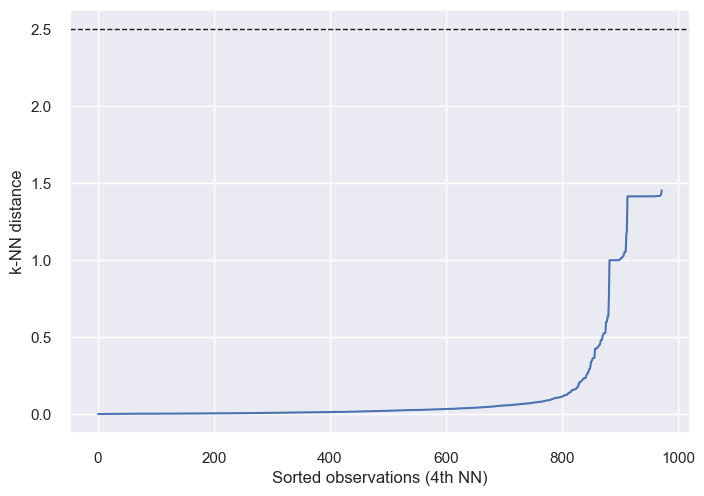

In [119]:
# Now, get the sorted kth column (distances with kth neighbors) and plot the kNN distance plot
k_dist = sort_neigh_dist[:, 4]
plt.plot(k_dist)
plt.axhline(y=2.5, linewidth=1, linestyle='dashed', color='k')
plt.ylabel("k-NN distance")
plt.xlabel("Sorted observations (4th NN)")
plt.show()

In [120]:
clusters = DBSCAN(eps=0.4, min_samples=5).fit(df)

# check unique clusters (-1 is noise)
cluster_labels = set(clusters.labels_)
print(cluster_labels)

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, -1}


In [121]:
# Get clusters size 
from collections import Counter
cluster_sizes = Counter(clusters.labels_)
print(cluster_sizes)

Counter({2: 138, 0: 112, -1: 108, 8: 90, 5: 53, 13: 52, 9: 38, 7: 36, 15: 34, 4: 28, 19: 24, 18: 22, 20: 22, 3: 20, 1: 14, 6: 14, 14: 14, 26: 12, 29: 12, 16: 11, 24: 11, 17: 9, 25: 9, 30: 9, 12: 8, 22: 8, 34: 8, 11: 7, 28: 7, 10: 6, 27: 6, 31: 6, 21: 5, 23: 5, 32: 5, 33: 5, 35: 5})


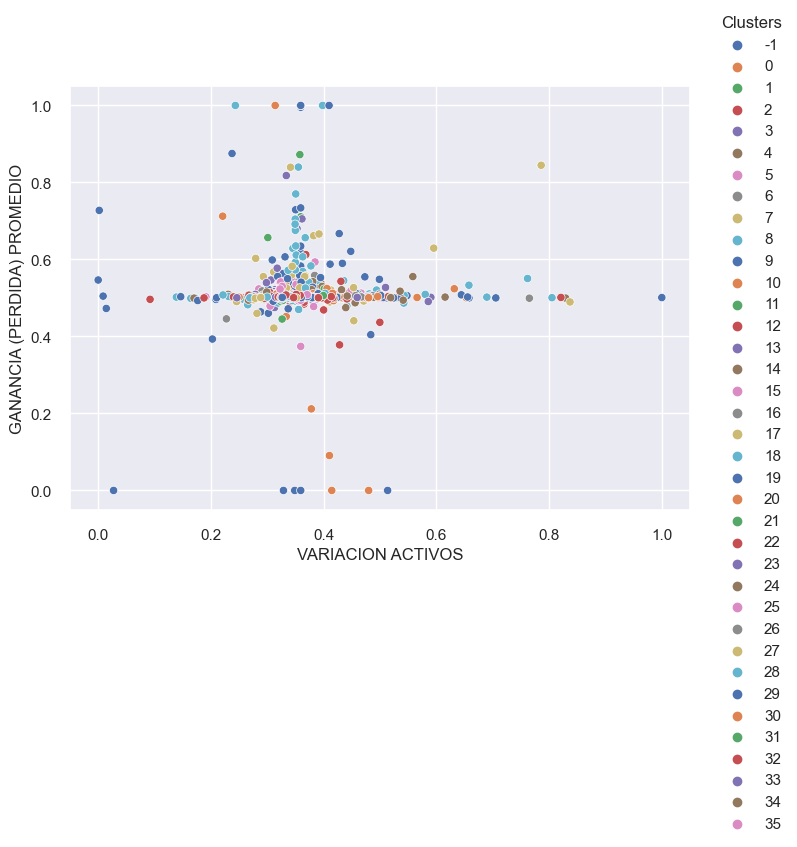

In [124]:
# Visualize clusters
p = sns.scatterplot(data=df, x="VARIACION ACTIVOS", y="GANANCIA (PERDIDA) PROMEDIO", hue=clusters.labels_, legend="full", palette="deep")
sns.move_legend(p, "upper right", bbox_to_anchor=(1.17, 1.2), title='Clusters')
plt.show()

In [123]:
# Para medir la eficacia del modelo se utilizará el Silhouette Score que nos indica que tan bien agrupados están los datos en cada cluster. Se busca que el valor obtenido sea lo más cercano a uno (1) posible.
score = silhouette_score(df, clusters.labels_, metric='euclidean')
print('Silhouette score: %.3f' % score)

Silhouette score: 0.772
